**Mounting google drive to access the files in drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Navigating to the folder in which I have my data files saved**

In [2]:
cd '/content/drive/MyDrive/Colab Notebooks/Ml _ GirlScript/student'

/content/drive/MyDrive/Colab Notebooks/Ml _ GirlScript/student


**Importing libraries to work with data and for creating and training models**

In [5]:
import pandas as pd #for data processing 
import numpy as np #for working with arrays and tensors
import tensorflow as tf #framework for machine learning
from tensorflow import keras as kr #api of tensorflow

##EDA

**Importing data**

In [ ]:
math_data = pd.read_csv('student-mat.csv', sep = ';')

In [ ]:
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


**Look out for data, how it is, spot changes to be done, edit remove etc and do it**

In [ ]:
columns = math_data.columns

for column in columns:
    if len(math_data[column].unique()) > 10:
        continue
    else:
        print("{:<12}: {}".format(column, math_data[column].unique()))


school      : ['GP' 'MS']
sex         : ['F' 'M']
age         : [18 17 15 16 19 22 20 21]
address     : ['U' 'R']
famsize     : ['GT3' 'LE3']
Pstatus     : ['A' 'T']
Medu        : [4 1 3 2 0]
Fedu        : [4 1 2 3 0]
Mjob        : ['at_home' 'health' 'other' 'services' 'teacher']
Fjob        : ['teacher' 'other' 'services' 'health' 'at_home']
reason      : ['course' 'other' 'home' 'reputation']
guardian    : ['mother' 'father' 'other']
traveltime  : [2 1 3 4]
studytime   : [2 3 1 4]
failures    : [0 3 2 1]
schoolsup   : ['yes' 'no']
famsup      : ['no' 'yes']
paid        : ['no' 'yes']
activities  : ['no' 'yes']
nursery     : ['yes' 'no']
higher      : ['yes' 'no']
internet    : ['no' 'yes']
romantic    : ['no' 'yes']
famrel      : [4 5 3 1 2]
freetime    : [3 2 4 1 5]
goout       : [4 3 2 1 5]
Dalc        : [1 2 5 3 4]
Walc        : [1 3 2 4 5]
health      : [3 5 1 2 4]


**So you found out about the categorical values, its time now to change it to numeric**

In [ ]:
math_data['school'] = math_data['school'].apply({'GP' : 0, 'MS' : 1}.get)
math_data.head(3) 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,0,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [ ]:
math_data['sex'] = math_data['sex'].apply({'F' : 0, 'M' : 1}.get)
math_data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,0,0,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,0,0,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [ ]:
math_data['address'] = math_data['address'].apply({'U' : 0, 'R' : 1}.get)
math_data['famsize'] = math_data['famsize'].apply({'LE3' : 0, 'GT3' : 1}.get)
math_data['Pstatus'] = math_data['Pstatus'].apply({'A' : 0, 'T' : 1}.get)
math_data['Mjob'] = math_data['Mjob'].apply({'at_home' : 1, 'health' : 2, 'services' : 3, 'teacher' : 4, 'other' : 5}.get)
math_data['Fjob'] = math_data['Fjob'].apply({'at_home' : 1, 'health' : 2, 'services' : 3, 'teacher' : 4, 'other' : 5}.get)
math_data['reason'] = math_data['reason'].apply({'course' : 1, 'home' : 2, 'reputation' : 3, 'other' : 4}.get)
math_data['guardian'] = math_data['guardian'].apply({'mother' : 1, 'father' : 2, 'other' : 3}.get)
math_data['schoolsup'] = math_data['schoolsup'].apply({'no' : 0, 'yes' : 1}.get)
math_data['famsup'] = math_data['famsup'].apply({'no' : 0, 'yes' : 1}.get)
math_data['paid'] = math_data['paid'].apply({'no' : 0, 'yes' : 1}.get)
math_data['activities'] = math_data['activities'].apply({'no' : 0, 'yes' : 1}.get)
math_data['nursery'] = math_data['nursery'].apply({'no' : 0, 'yes' : 1}.get)
math_data['higher'] = math_data['higher'].apply({'no' : 0, 'yes' : 1}.get)
math_data['internet'] = math_data['internet'].apply({'no' : 0, 'yes' : 1}.get)
math_data['romantic'] = math_data['romantic'].apply({'no' : 0, 'yes' : 1}.get)
math_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,0,4,4,1,4,1,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,1,1,1,1,5,1,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,1,1,1,1,5,4,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,1,4,2,2,3,2,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,1,3,3,5,5,2,2,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
5,0,1,16,0,0,1,4,3,3,5,3,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,15
6,0,1,16,0,0,1,2,2,5,5,2,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,12,12,11
7,0,0,17,0,1,0,4,4,5,4,2,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,6,5,6
8,0,1,15,0,0,0,3,2,3,5,2,1,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,16,18,19
9,0,1,15,0,1,1,3,4,5,5,2,1,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,14,15,15


**Consider a part of data** 

We will save this cleaned data and then work on it

Question was : `predict on G3` i.e. the final grade so in this we are choosing the column `we` think might be  `influencing` the final grades .. ( eg.  more freetime => wastage of time => less grade ---> just saying)


Like this `based on question` you can choose anything `you want` in future .. but `think before` you choose

In [ ]:
cleaned_math_data = math_data[['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime', 'studytime', 'absences', 'G1', 'G2', 'G3']]

In [ ]:
cleaned_math_data.head()

,school,sex,address,Mjob,Fjob,higher,freetime,studytime,absences,G1,G2,G3
0,0,0,0,1,4,1,3,2,6,5,6,6
1,0,0,0,1,5,1,3,2,4,5,5,6
2,0,0,0,1,5,1,3,2,10,7,8,10
3,0,0,0,2,3,1,2,3,2,15,14,15
4,0,0,0,5,5,1,3,2,4,6,10,10


**Now save this new cleaned data into a seperate file**

In [ ]:
cleaned_math_data.to_csv('Cleaned_math_data.csv')

In [ ]:
ls

Cleaned_math_data.csv  student-merge.R  student.txt
student-mat.csv        student-por.csv


**Now once we have the cleaned data we need to visualise it**


for that we use seaborn library (can also use matplotlib)

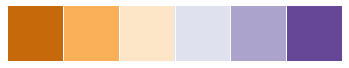

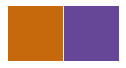

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr'))
# pal = sns.color_palette('PuOr', 6)
# pal.as_hex()

#import matplotlib.pyplot as plt 
#plt.style.use(['seaborn'])  ; idk why they did this
sns_colors = ['#c6690c', '#664697'] 
sns.set_palette(sns_colors)  
sns.palplot(sns.color_palette(sns_colors))  

In [ ]:
print(f'''
The columns in my cleaned data frame are : 
{cleaned_math_data.columns}
''')


The columns in my cleaned data frame are : 
Index(['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')



You can analyse the data like this ... like G1 vs G3 --> better vals for G1 => better vals for G3 as well ... Lower the absenties => better grades and so on  

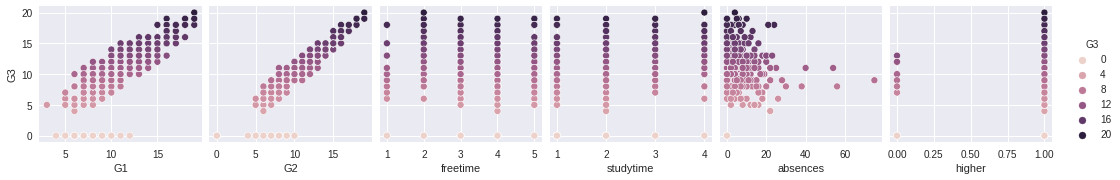

In [ ]:
sns.pairplot(cleaned_math_data, 
             x_vars = ['G1', 'G2', 'freetime', 'studytime', 'absences', 'higher'], 
             y_vars = ['G3'],
             diag_kind = 'kde',
             hue = 'G3')

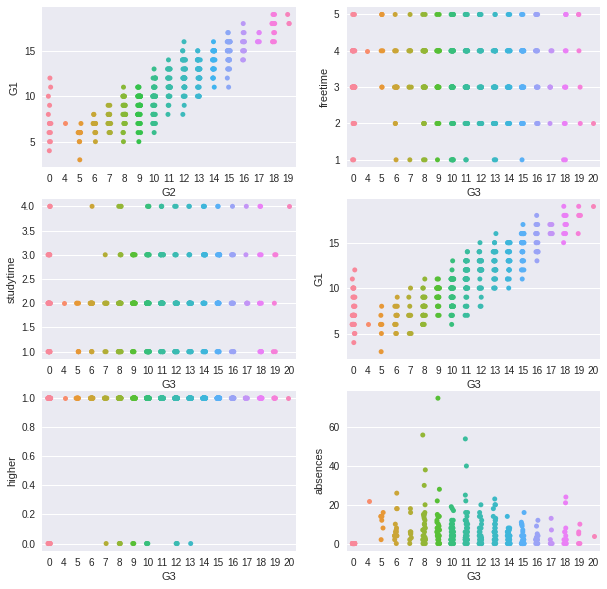

In [ ]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(3,2, figsize=(10,10))

#three rows and 2 columns all starting from (0,0)

sns.stripplot(y='G1', x='G2', data=cleaned_math_data, hue=None, ax=axarr[0][0])
sns.stripplot(y='G1', x='G3', data=cleaned_math_data, hue=None, ax=axarr[1][1])
sns.stripplot(y='studytime', x='G3', data=cleaned_math_data, hue=None, ax=axarr[1][0])
sns.stripplot(y='freetime', x='G3', data=cleaned_math_data, hue=None,  ax=axarr[0][1])
sns.stripplot(y='higher', x='G3', data=cleaned_math_data, hue=None, ax=axarr[2][0])
sns.stripplot(y='absences', x='G3', data=cleaned_math_data, hue=None, ax=axarr[2][1])

Now that all the graphs and stuff is done well split the data into training and test 
for now we are doing 80 - 20 split 

In [ ]:
trainDataset = cleaned_math_data.sample(frac = 0.8, random_state=0)
testDataset = cleaned_math_data.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       0    0        0     4     4  ...          3         4  14  14  14
318       0    0        1     1     3  ...          3         0  11  11  10
317       0    0        0     5     5  ...          3         9   9  10   9
65        0    0        0     4     3  ...          2         2  16  15  15
59        0    0        0     3     5  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        0    1        0     5     5  ...          2         0  14  15  15
25       0    0        0     3     3  ...          1        14   6   9   8
28       0    1        0     3     5  ...          2         4  11  11  11
31       0    1        0     3     3  ...          2         0  17  16  17
32       0    1        1     4     1  ...          2         0  17  16  16

[5 rows x 12 columns]


Now we want to split the Dataset into features and labels

In [ ]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       0    0        0     4     4  ...          3         4  14  14  14
318       0    0        1     1     3  ...          3         0  11  11  10
317       0    0        0     5     5  ...          3         9   9  10   9
65        0    0        0     4     3  ...          2         2  16  15  15
59        0    0        0     3     5  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        0    1        0     5     5  ...          2         0  14  15  15
25       0    0        0     3     3  ...          1        14   6   9   8
28       0    1        0     3     5  ...          2         4  11  11  11
31       0    1        0     3     3  ...          2         0  17  16  17
32       0    1        1     4     1  ...          2         0  17  16  16

[5 rows x 12 columns]


In [ ]:
trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())
print("==========================================")
print(trainFeatures.head())
print(testFeatures.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64
     school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
329       0    0        0     4     4  ...         3          3         4  14  14
318       0    0        1     1     3  ...         3          3         0  11  11
317       0    0        0     5     5  ...         3          3         9   9  10
65        0    0        0     4     3  ...         4          2         2  16  15
59        0    0        0     3     5  ...         2          2         2  15  16

[5 rows x 11 columns]
    school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
9        0    1        0     5     5  ...         5          2         0  14  15
25       0    0        0     3     3  ...         2          1        14   6   9
28       0    1        0     3     5  ...         3          2         4  11  11
31       0    1     

In [ ]:
print(f"Shape of train Features : {trainFeatures.shape}")
print(f"Shape of test Features : {testFeatures.shape}")
print(f"Shape of train Labels : {trainLabels.shape}")
print(f"Shape of train Labels : {testLabels.shape}")
print(f"Total shape : {cleaned_math_data.shape}")

Shape of train Features : (316, 11)
Shape of test Features : (79, 11)
Shape of train Labels : (316,)
Shape of train Labels : (79,)
Total shape : (395, 12)


##Univariate Linear Regression

In [ ]:
ls

Cleaned_math_data.csv  student-merge.R  student.txt
student-mat.csv        student-por.csv


In [ ]:
math_data = pd.read_csv('Cleaned_math_data.csv')

In [ ]:
#seperating the data for univar linear regression (y = G3, x = G1)
univarData = math_data[['G1', 'G3']];
univarData.head() 

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [ ]:
univarData.to_csv('univariateLinearRegression.csv')

In [ ]:
ls

Cleaned_math_data.csv  student-merge.R  student.txt
student-mat.csv        student-por.csv  univariateLinearRegression.csv


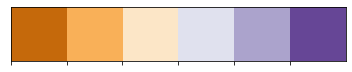

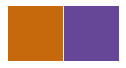

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.palplot(sns.color_palette('PuOr'))
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] 
sns.set_palette(sns_colors)  
sns.palplot(sns.color_palette(sns_colors))


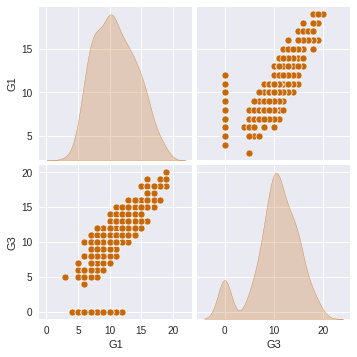

In [ ]:
sns.pairplot(univarData, 
             x_vars = ['G1', 'G3'],
             y_vars = ['G1', 'G3'], 
             diag_kind = 'kde')

Now we'll be doing the actaul model thingy 

Splitting the data then training model then plotting the regression line and so on

In [ ]:
#Remember the way the data is split using pop and copy ... indexing doesnt work :(
trainData = univarData.sample(frac = 0.8, random_state = 0)
testData = univarData.drop(trainData.index)

trainFeatures = trainData.copy()
testFeatures = testData.copy()
trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

In [ ]:
print(f'Train Data : \n{trainData.head()}')
print(f'Test Data : \n{testData.head()}')
print("====================================================")
print(f'Train Data Featues : \n{trainFeatures.head()}')
print(f'Test Data Features : \n{testFeatures.head()}')
print("====================================================")
print(f'Train Data Labels : \n{trainLabels.head()}')
print(f'Test Data Labels : \n{testLabels.head()}')

Train Data : 
     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
Test Data : 
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16
Train Data Featues : 
     G1
329  14
318  11
317   9
65   16
59   15
Test Data Features : 
    G1
9   14
25   6
28  11
31  17
32  17
Train Data Labels : 
329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
Test Data Labels : 
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


Time to train the moedel baby

In [ ]:
#recollect the explaination of neural networks (refer the written notes) 
#now this tf.keras.layers.Dense(1) meaning kya hai ?
#Dense(1) means only 1 perceptron ... first stage of the neural network actually ... no going into hidden layers and all
#this is Lin Reg with just 1 feature so just 1 neuron is enough => Dense(1)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])


In [ ]:
model.compile(
              loss='mean_absolute_error',
              optimizer = 'adam',
              metrics = ['mae', 'mse'])

In [ ]:
numOfEpochs = 400

#now we created the history variable in order for us to plot graphs in the later phase .. follow on you'll understand
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numOfEpochs)

Epoch 1/400
10/10 [==============================] - 1s 18ms/step - loss: 13.7112 - mae: 13.7112 - mse: 217.3975 - val_loss: 14.4201 - val_mae: 14.4201 - val_mse: 238.3987
Epoch 2/400
10/10 [==============================] - 0s 4ms/step - loss: 13.5932 - mae: 13.5932 - mse: 213.8610 - val_loss: 14.2957 - val_mae: 14.2957 - val_mse: 234.4874
Epoch 3/400
10/10 [==============================] - 0s 4ms/step - loss: 13.4756 - mae: 13.4756 - mse: 210.3621 - val_loss: 14.1712 - val_mae: 14.1712 - val_mse: 230.6039
Epoch 4/400
10/10 [==============================] - 0s 4ms/step - loss: 13.3583 - mae: 13.3583 - mse: 206.9250 - val_loss: 14.0464 - val_mae: 14.0464 - val_mse: 226.7457
Epoch 5/400
10/10 [==============================] - 0s 4ms/step - loss: 13.2399 - mae: 13.2399 - mse: 203.4452 - val_loss: 13.9221 - val_mae: 13.9221 - val_mse: 222.9378
Epoch 6/400
10/10 [==============================] - 0s 4ms/step - loss: 13.1231 - mae: 13.1231 - mse: 200.1300 - val_loss: 13.7971 - val_mae: 1

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


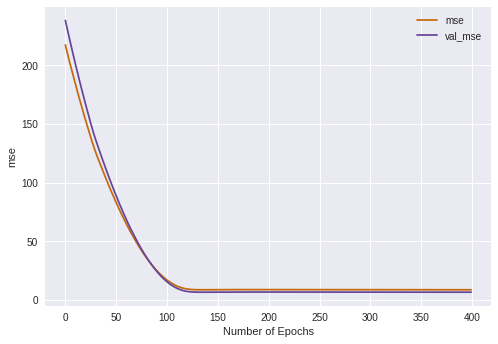

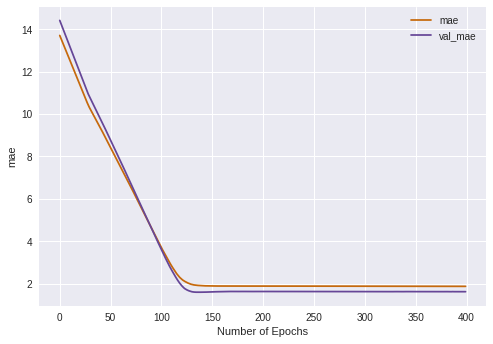

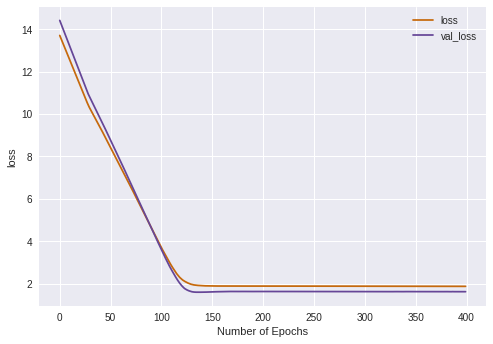

In [ ]:
def plotGraphs(subject):
    plt.plot(history.history[subject])
    plt.plot(history.history[f'val_{subject}'])
    plt.xlabel('Number of Epochs')
    plt.ylabel(subject)
    plt.legend([subject, f'val_{subject}'])
    plt.show()

plotGraphs('mse')
plotGraphs('mae')
plotGraphs('loss')


In [ ]:
model.predict([1])

array([[1.8016157]], dtype=float32)

In [ ]:
#hypothesis prediction after what we think might be the best line after running the model
predList = [1, 2, 3, 4, 5]

print(f'''
Test Features List : {predList}

Predicted Values : {model.predict(predList)}

Predicted Values (Flatenned Values) : {model.predict(predList).flatten()}
''')


Test Features List : [1, 2, 3, 4, 5]

Predicted Values : [[1.8016157]
 [2.728488 ]
 [3.65536  ]
 [4.582232 ]
 [5.5091043]]

Predicted Values (Flatenned Values) : [1.8016157 2.728488  3.65536   4.582232  5.5091043]



In [26]:
#Scatter plot for our predictions (To see how well we predicted the values --> graph should kinda be same like the original graph)

def predictionsPlot(labels, predictions):
    plt.scatter(labels, predictions)
    plt.xlabel('True Value / Labels')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0, plt.xlim()[1]])
    plt.ylim([0, plt.ylim()[1]])
    plt.show()

predictionsPlot(testLabels, model.predict(testFeatures))

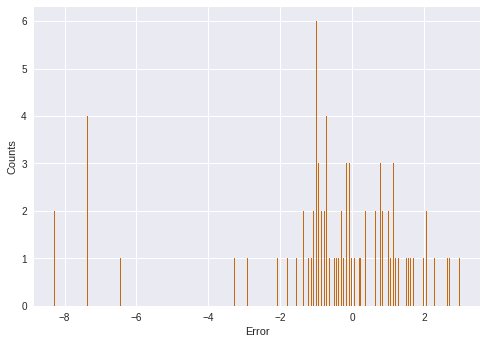

In [ ]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = labels - preds
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(model.predict(testFeatures).flatten(), testLabels, numOfEpochs)

**And thats it ... End of UNIVARIATE LINEAR REGRESSION**

##MultiVariate Linear Regression

In [6]:
ls

Cleaned_math_data.csv  student-merge.R  student.txt
student-mat.csv        student-por.csv  univariateLinearRegression.csv


In [8]:
math_data = pd.read_csv('student-mat.csv', sep = ";") 
math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [10]:
cleaned_data = pd.read_csv('Cleaned_math_data.csv', sep = ',')
cleaned_data.head()

,Unnamed: 0,school,sex,address,Mjob,Fjob,higher,freetime,studytime,absences,G1,G2,G3
0,0,0,0,0,1,4,1,3,2,6,5,6,6
1,1,0,0,0,1,5,1,3,2,4,5,5,6
2,2,0,0,0,1,5,1,3,2,10,7,8,10
3,3,0,0,0,2,3,1,2,3,2,15,14,15
4,4,0,0,0,5,5,1,3,2,4,6,10,10


We will be predicting on G3 based on other Features (from school to G2)

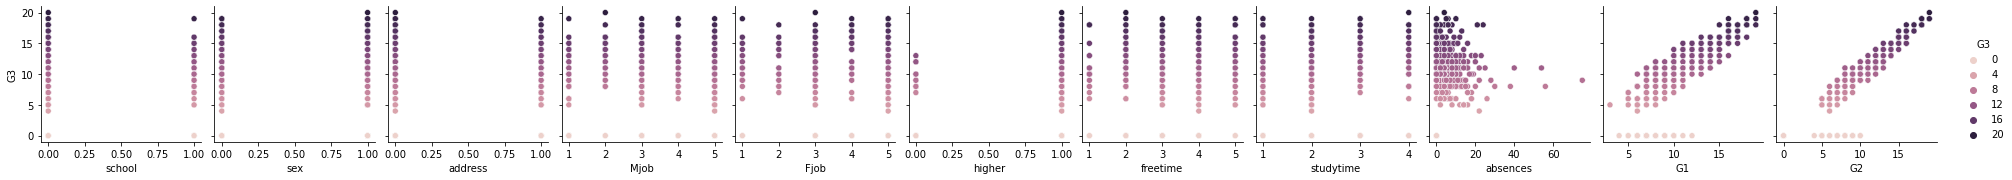

In [13]:
import seaborn as sns

sns.pairplot(
    cleaned_data,
    x_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime', 'studytime', 'absences', 'G1', 'G2'],
    y_vars = ['G3'],
    diag_kind = 'kde',
    hue = 'G3'
)

In [ ]:
trainData = cleaned_data.sample(frac = 0.8, random_state = 0)
testData = cleaned_data.drop(trainData.index)

trainFeatures = trainData.copy()
testFeatures = testData.copy()
trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')
trainFeatures.pop('Unnamed: 0')
testFeatures.pop('Unnamed: 0')

In [20]:
print(f'Train Data : \n{trainData.head()}')
print(f'Test Data : \n{testData.head()}')
print("====================================================")
print(f'Train Data Featues : \n{trainFeatures.head()}')
print(f'Test Data Features : \n{testFeatures.head()}')
print("====================================================")
print(f'Train Data Labels : \n{trainLabels.head()}')
print(f'Test Data Labels : \n{testLabels.head()}')

Train Data : 
     Unnamed: 0  school  sex  address  Mjob  ...  studytime  absences  G1  G2  G3
329         329       0    0        0     4  ...          3         4  14  14  14
318         318       0    0        1     1  ...          3         0  11  11  10
317         317       0    0        0     5  ...          3         9   9  10   9
65           65       0    0        0     4  ...          2         2  16  15  15
59           59       0    0        0     3  ...          2         2  15  16  16

[5 rows x 13 columns]
Test Data : 
    Unnamed: 0  school  sex  address  Mjob  ...  studytime  absences  G1  G2  G3
9            9       0    1        0     5  ...          2         0  14  15  15
25          25       0    0        0     3  ...          1        14   6   9   8
28          28       0    1        0     3  ...          2         4  11  11  11
31          31       0    1        0     3  ...          2         0  17  16  17
32          32       0    1        1     4  ...      

In [22]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil((2 * numFeatures) / 3)
print(inputNeurons)

8


In [23]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(units=2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [24]:
model.compile(
              loss='mean_absolute_error',
              optimizer = 'adam',
              metrics = ['mae', 'mse'])

In [25]:
numOfEpochs = 300

history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numOfEpochs)

Epoch 1/300
10/10 [==============================] - 1s 25ms/step - loss: 8.2980 - mae: 8.2980 - mse: 86.5268 - val_loss: 8.3259 - val_mae: 8.3259 - val_mse: 86.3511
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 7.8767 - mae: 7.8767 - mse: 79.0833 - val_loss: 7.8746 - val_mae: 7.8746 - val_mse: 78.0922
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 7.4979 - mae: 7.4979 - mse: 71.9391 - val_loss: 7.4022 - val_mae: 7.4022 - val_mse: 69.7825
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 7.0770 - mae: 7.0770 - mse: 64.2157 - val_loss: 6.8748 - val_mae: 6.8748 - val_mse: 61.3242
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 6.6313 - mae: 6.6313 - mse: 56.5516 - val_loss: 6.3043 - val_mae: 6.3043 - val_mse: 52.4741
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 6.1458 - mae: 6.1458 - mse: 48.6037 - val_loss: 5.6966 - val_mae: 5.6966 - val_mse: 43.5565
Epoch 7/3

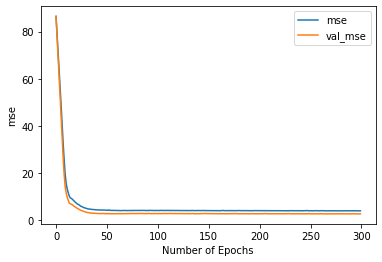

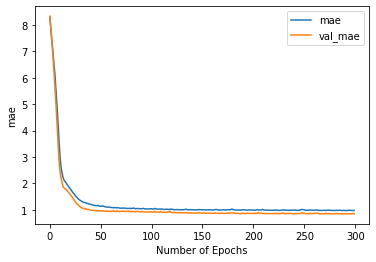

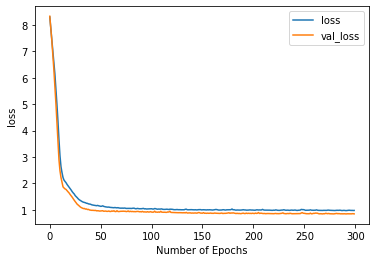

In [28]:
import matplotlib.pyplot as plt

def plotGraphs(subject):
    plt.plot(history.history[subject])
    plt.plot(history.history[f'val_{subject}'])
    plt.xlabel('Number of Epochs')
    plt.ylabel(subject)
    plt.legend([subject, f'val_{subject}'])
    plt.show()

plotGraphs('mse')
plotGraphs('mae')
plotGraphs('loss')

In [32]:
predList = [1, 2, 3, 4, 5]

print(f'''
Test Features List : {testFeatures.head()}

Predicted Values : {model.predict(testFeatures)}

Predicted Values (Flatenned Values) : {model.predict(testFeatures).flatten()}
''')



Test Features List :     school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
9        0    1        0     5     5  ...         5          2         0  14  15
25       0    0        0     3     3  ...         2          1        14   6   9
28       0    1        0     3     5  ...         3          2         4  11  11
31       0    1        0     3     3  ...         3          2         0  17  16
32       0    1        1     4     1  ...         5          2         0  17  16

[5 rows x 11 columns]

Predicted Values : [[ 1.49683447e+01]
 [ 7.84570122e+00]
 [ 1.10158863e+01]
 [ 1.59766321e+01]
 [ 1.57828045e+01]
 [ 1.19637871e+01]
 [ 1.34753246e+01]
 [ 1.79891930e+01]
 [ 1.89669628e+01]
 [ 9.98433018e+00]
 [ 1.49628239e+01]
 [ 1.49752569e+01]
 [ 5.66929436e+00]
 [ 6.44672441e+00]
 [ 1.00220203e+01]
 [ 1.40224724e+01]
 [ 1.04357853e+01]
 [ 1.70363503e+01]
 [ 8.79661751e+00]
 [ 1.00396290e+01]
 [ 1.50032654e+01]
 [ 1.39810677e+01]
 [ 1.30445213e+01]
 [ 1.4065224

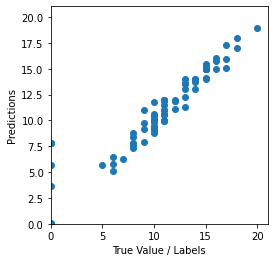

In [33]:
def predictionsPlot(labels, predictions):
    plt.scatter(labels, predictions)
    plt.xlabel('True Value / Labels')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0, plt.xlim()[1]])
    plt.ylim([0, plt.ylim()[1]])
    plt.show()

predictionsPlot(testLabels, model.predict(testFeatures))

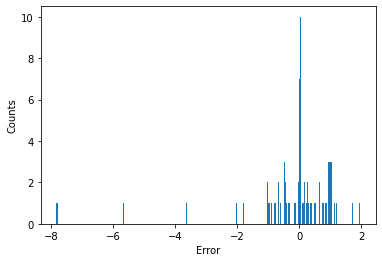

In [34]:
def errorPlot(preds, labels, counts):
  errors = labels - preds
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(model.predict(testFeatures).flatten(), testLabels, numOfEpochs)